## Implementation of Multi-class Logistic Regression using Regularization method

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

In [2]:
X, Y = datasets.load_digits(return_X_y=True)
Y = Y.reshape((-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

In [3]:
def hypothesis(X, theta):
    val = np.dot(X, theta)
    val = 1.0 / (1.0 + np.exp(-1*val))
    return val

def gradient(X, Y, theta, reg_factor):
    h = hypothesis(X, theta)
    grad = np.dot(X.T, h-Y)
    
    grad[1:] += reg_factor * theta[1:]
    return grad/X.shape[0]

def loss(X, Y, theta, reg_factor):
    e1 = e2 = 0.0
    (m, n) = X.shape
    h = hypothesis(X, theta)
    e1 = -( (Y*np.log2(h)) + ((1-Y)*np.log2(1-h)) )
    
    e2 = reg_factor * np.square(theta[1:])
    return (e1.sum() + e2.sum())/m
        
def grad_desc(X, Y, lr=0.1, max_itr=400, reg_factor=100):
    theta = np.zeros((X.shape[1], 1))
    error = []
    for i in range(max_itr):
        grad = gradient(X, Y, theta, reg_factor)
        theta = theta - lr*grad
        error.append(loss(X, Y, theta, reg_factor))
    return theta, error

In [4]:
def oneVsAll(X, Y, lr=0.01, max_itr=400, reg_factor=100):
    num_labels = np.unique(Y).shape[0]
    all_theta = np.zeros((num_labels, X.shape[1]))
    total_err = []
    
    for i in range(num_labels):
        y = (Y == i).astype('int8')
        (theta, err) = grad_desc(X, y, lr, max_itr, reg_factor)
        all_theta[i, :] = theta.reshape((1, -1))
        total_err.append(err)
        
    total_err = np.sum(np.array(total_err), axis=0)
    return all_theta, total_err

def predictOneVsAll(X, theta):
    val = hypothesis(X, all_theta.T)
    return np.argmax(val, axis=1)

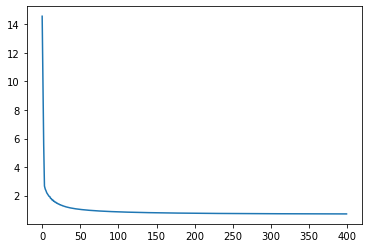

In [5]:
all_theta, err = oneVsAll(X_train, y_train)
plt.plot(err)
plt.show()

In [6]:
y_pred = predictOneVsAll(X_test, all_theta)
score = metrics.accuracy_score(y_test, y_pred)
print(score)

0.9555555555555556
